# Day 2 - Decision Tree Regressor "classifier" (Optional)
Interestingly, you can use the [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) to do classification tasks as well

But instead of an integer of the specific class you would get a float as the predicted label.

You will use the dataset in *"diabetes.csv"*. It has several health related columns and the outcome of a diabetes test.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


### Build a classifier

#### 1. Read diabetes data.

In [9]:
from pathlib import Path

paths = [
    Path("diabetes.csv"),
    Path.cwd() / "diabetes.csv",
    Path.home() / "Downloads" / "diabetes.csv",
]

data_path = None
for p in paths:
    if p.exists():
        data_path = p
        break

if data_path is None:
    raise FileNotFoundError("diabetes.csv not found. Put it next to the notebook.")

df = pd.read_csv(data_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 2. Explore and visualize data. Make conclusions.

<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


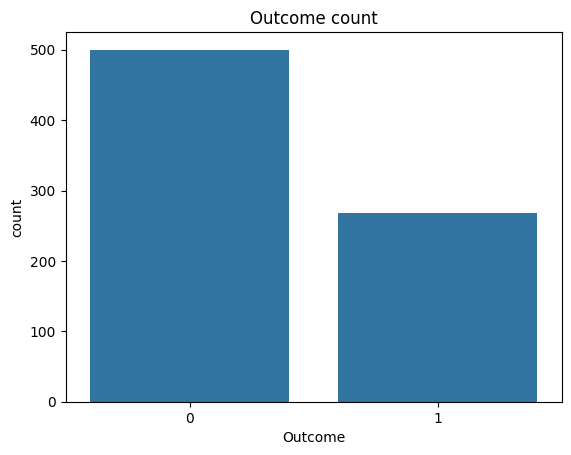

<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


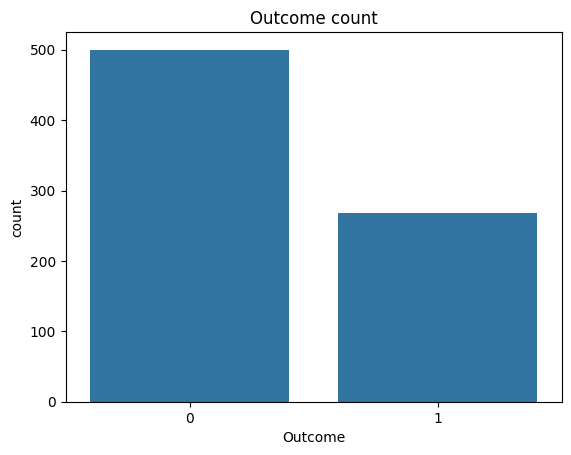

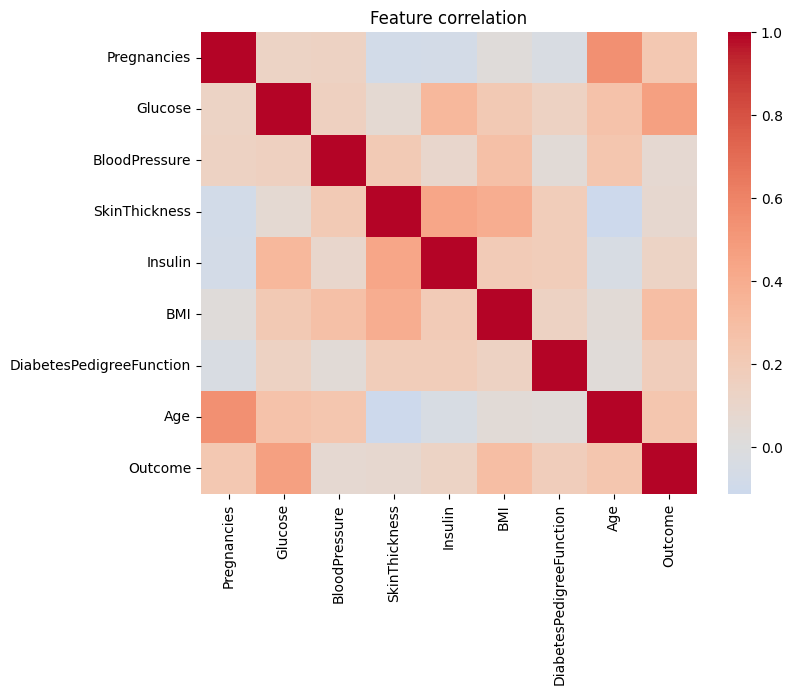

In [10]:
df.info()
df.describe()

df.isna().sum()

sns.countplot(x="Outcome", data=df)
plt.title("Outcome count")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Feature correlation")
plt.show()

#### 3. Split the dataset in labels and features.

In [11]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


#### 4. Split the dataset in training and test set (80% and 20%).

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((614, 8), (154, 8))

#### 5. Build a decision tree with some parameters for max depth and min samples and any of gini or entropy.

In [13]:
reg = DecisionTreeRegressor(
    max_depth=4,
    min_samples_leaf=5,
    random_state=42,
    criterion="squared_error",
)

reg.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf

#### 6. Provide predictions for test set.

In [14]:
y_pred = reg.predict(X_test)
y_pred[:10]

array([1.        , 0.28787879, 0.13836478, 0.57943925, 0.01834862,
       0.13836478, 0.28787879, 1.        , 0.13836478, 0.83928571])

#### 7. Evaluate results.

In [15]:
y_pred_class = (y_pred >= 0.5).astype(int)

acc = metrics.accuracy_score(y_test, y_pred_class)
prec = metrics.precision_score(y_test, y_pred_class, zero_division=0)
rec = metrics.recall_score(y_test, y_pred_class, zero_division=0)
f1 = metrics.f1_score(y_test, y_pred_class, zero_division=0)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1: {f1:.3f}")
print(f"RMSE: {rmse:.3f}")

Accuracy: 0.786
Precision: 0.706
Recall: 0.667
F1: 0.686
RMSE: 0.414


Results are fair: accuracy 0.786 is acceptable, but recall 0.667 shows missed positives. Precision 0.706 is only moderate so false positives still occur. Overall the model is usable but not strong tune depth or threshold to improve recall or F1.

#### 7. Visualize tree.

Use plot tree to visualize the tree. You can use figsize inside of plt.figure to control the size of the visualization.



In [19]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree

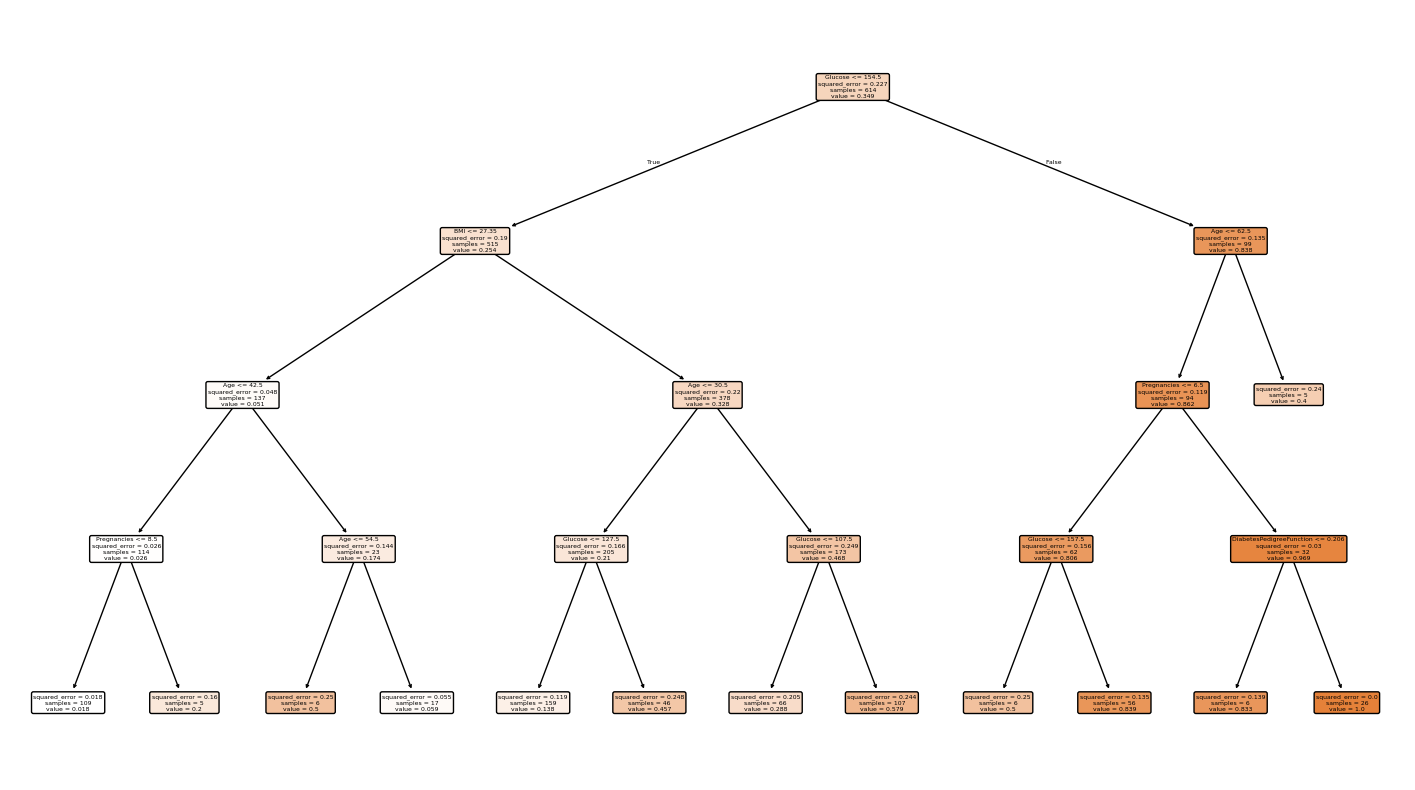

In [20]:
plt.figure(figsize=(18, 10))
plot_tree(reg, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [21]:
importance = pd.Series(reg.feature_importances_, index=X.columns).sort_values(ascending=False)
importance

Glucose                     0.677864
Age                         0.161045
BMI                         0.145115
Pregnancies                 0.013429
DiabetesPedigreeFunction    0.002548
BloodPressure               0.000000
SkinThickness               0.000000
Insulin                     0.000000
dtype: float64

# FINAL THOUGHTS
Answer the folowing questions:
- What is the possible benefit of using a regressor instead of a classifier?
- What drawbacks can you imagine when using a regressor to complete a non-binary classification?
- Which metric do you need to optimize the model for? Accuracy, Precision, Recall, F1? Why?

Final Thoughts;
1) Regressor gives a score, so you can choose a cutoff.
2) For many classes, scores can be unclear.
3) If classes are imbalanced, use F1 to balance precision and recall